<a href="https://colab.research.google.com/github/renu0071989/insurance-claim/blob/main/Feature_extraction_and_ML_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
data_train=pd.read_csv("/content/Insurance_train.csv")
data_test=pd.read_csv("/content/Insurance_test.csv")

In [ ]:
##FEATURE SELECTION AND EXTRACTION

In [ ]:
##WE NEED TO CONVERT ALL THE CATEGORICAL FEATURE TO NUMERICAL FEATURES

In [ ]:
categorical_nominal_vars = ['area_cluster', 'population_density', 'make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags', 'rear_brakes_type', 'displacement', 'steering_type', 'ncap_rating']
categorical_ordinal_vars = ['cylinder', 'transmission_type', 'gear_box']
binary_vars = ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']



In [ ]:
##SPLIT TRAIN AND TEST

In [ ]:
X_train = data_train.drop(['is_claim', 'policy_id'], axis=1)

y_train = data_train['is_claim']
X_test = data_test.drop('policy_id', axis=1).copy()


In [ ]:
##USE LABEL ENCODERS FOR ORDINAL AND BINARY VARIABLES

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define the categorical ordinal variables
categorical_ordinal_vars = ['cylinder', 'transmission_type', 'gear_box']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical ordinal variables
for var in categorical_ordinal_vars:
    X_train[var] = label_encoder.fit_transform(X_train[var])
    X_test[var] = label_encoder.transform(X_test[var])

In [ ]:
binary_vars = ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera',
               'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger',
               'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering',
               'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']

#Encode the categorical ordinal variables
for var in binary_vars:
    X_train[var] = label_encoder.fit_transform(X_train[var])
    X_test[var] = label_encoder.transform(X_test[var])


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
one_hot_encoder = OneHotEncoder()

# Fit the encoder on X_train to learn the categories
one_hot_encoder.fit(X_train[categorical_nominal_vars])

# Transform the selected columns in X_train
X_train_encoded = one_hot_encoder.transform(X_train[categorical_nominal_vars])

# Transform the selected columns in X_test using the learned categories from X_train
X_test_encoded = one_hot_encoder.transform(X_test[categorical_nominal_vars])

# Create new column names based on the encoded categories
encoded_categories = one_hot_encoder.categories_
new_column_names = [f"{var}_{category}" for var, categories in zip(categorical_nominal_vars, encoded_categories) for category in categories]

# Create DataFrames from the encoded arrays with the new column names
X_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), columns=new_column_names)
X_test_encoded_df = pd.DataFrame(X_test_encoded.toarray(), columns=new_column_names)

# Concatenate the encoded DataFrames with the original DataFrames
X_train = pd.concat([X_train.drop(categorical_nominal_vars, axis=1), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(categorical_nominal_vars, axis=1), X_test_encoded_df], axis=1)


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Columns: 148 entries, policy_tenure to ncap_rating_5
dtypes: float64(124), int64(24)
memory usage: 44.1 MB


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Columns: 148 entries, policy_tenure to ncap_rating_5
dtypes: float64(124), int64(24)
memory usage: 66.2 MB


In [ ]:
##WE NEED TO STANDARDISE THE VARIABLES

In [ ]:
numerical_vars = ['policy_tenure', 'age_of_car', 'turning_radius', 'length', 'width', 'height', 'gross_weight','age_of_policyholder']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on X_train to learn the minimum and maximum values
scaler.fit(X_train[numerical_vars])

# Transform the numerical columns in X_train
X_train[numerical_vars] = scaler.transform(X_train[numerical_vars])

# Transform the numerical columns in X_test
X_test[numerical_vars] = scaler.transform(X_test[numerical_vars])


In [ ]:
X_test

,policy_tenure,age_of_car,age_of_policyholder,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,cylinder,transmission_type,gear_box,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,area_cluster_C1,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,population_density_290,population_density_3264,population_density_4076,population_density_4990,population_density_5410,population_density_6108,population_density_6112,population_density_7788,population_density_8794,population_density_13051,population_density_16206,population_density_16733,population_density_17804,population_density_20905,population_density_21622,population_density_27003,population_density_27742,population_density_34738,population_density_34791,population_density_35036,population_density_65567,population_density_73430,make_1,make_2,make_3,make_4,make_5,segment_A,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M1,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_CNG,fuel_type_Diesel,fuel_type_Petrol,max_torque_113Nm@4400rpm,max_torque_170Nm@4000rpm,max_torque_200Nm@1750rpm,max_torque_200Nm@3000rpm,max_torque_250Nm@2750rpm,max_torque_60Nm@3500rpm,max_torque_82.1Nm@3400rpm,max_torque_85Nm@3000rpm,max_torque_91Nm@4250rpm,max_power_113.45bhp@4000rpm,max_power_118.36bhp@5500rpm,max_power_40.36bhp@6000rpm,max_power_55.92bhp@5300rpm,max_power_61.68bhp@6000rpm,max_power_67.06bhp@5500rpm,max_power_88.50bhp@6000rpm,max_power_88.77bhp@4000rpm,max_power_97.89bhp@3600rpm,engine_type_1.0 SCe,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,airbags_1,airbags_2,airbags_6,rear_brakes_type_Disc,rear_brakes_type_Drum,displacement_796,displacement_998,displacement_999,displacement_1196,displacement_1197,displacement_1199,displacement_1493,displacement_1497,displacement_1498,steering_type_Electric,steering_type_Manual,steering_type_Power,ncap_rating_0,ncap_rating_2,ncap_rating_3,ncap_rating_4,ncap_rating_5
0,0.243199,0.00,0.418919,0,0,0,1,0,0,1,0,0.142857,0.000000,0.119048,0.000000,0.200299,0,0,0,0,0,0,0,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.218455,0.13,0.216216,0,1,0,1,0,1,1,0,0.428571,0.467836,0.773810,0.157143,0.424514,1,0,0,0,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.233293,0.12,0.229730,0,0,0,0,1,0,0,0,0.714286,0.334503,0.309524,0.042857

In [ ]:
X_train

,policy_tenure,age_of_car,age_of_policyholder,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,cylinder,transmission_type,gear_box,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,area_cluster_C1,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,population_density_290,population_density_3264,population_density_4076,population_density_4990,population_density_5410,population_density_6108,population_density_6112,population_density_7788,population_density_8794,population_density_13051,population_density_16206,population_density_16733,population_density_17804,population_density_20905,population_density_21622,population_density_27003,population_density_27742,population_density_34738,population_density_34791,population_density_35036,population_density_65567,population_density_73430,make_1,make_2,make_3,make_4,make_5,segment_A,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M1,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_CNG,fuel_type_Diesel,fuel_type_Petrol,max_torque_113Nm@4400rpm,max_torque_170Nm@4000rpm,max_torque_200Nm@1750rpm,max_torque_200Nm@3000rpm,max_torque_250Nm@2750rpm,max_torque_60Nm@3500rpm,max_torque_82.1Nm@3400rpm,max_torque_85Nm@3000rpm,max_torque_91Nm@4250rpm,max_power_113.45bhp@4000rpm,max_power_118.36bhp@5500rpm,max_power_40.36bhp@6000rpm,max_power_55.92bhp@5300rpm,max_power_61.68bhp@6000rpm,max_power_67.06bhp@5500rpm,max_power_88.50bhp@6000rpm,max_power_88.77bhp@4000rpm,max_power_97.89bhp@3600rpm,engine_type_1.0 SCe,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,airbags_1,airbags_2,airbags_6,rear_brakes_type_Disc,rear_brakes_type_Drum,displacement_796,displacement_998,displacement_999,displacement_1196,displacement_1197,displacement_1199,displacement_1493,displacement_1497,displacement_1498,steering_type_Electric,steering_type_Manual,steering_type_Power,ncap_rating_0,ncap_rating_2,ncap_rating_3,ncap_rating_4,ncap_rating_5
0,0.368130,0.05,0.500000,0,0,0,1,0,0,1,0,0.142857,0.000000,0.119048,0.000000,0.200299,0,0,0,0,0,0,0,1,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.480580,0.02,0.121622,0,0,0,1,0,0,1,0,0.142857,0.000000,0.119048,0.000000,0.200299,0,0,0,0,0,0,0,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.601457,0.02,0.135135,0,0,0,1,0,0,1,0,0.142857,0.000000,0.119048,0.000000

In [ ]:
##The data set is highly imbalanced. The SMOTE oversampling technique increases the number of samples in the minority class to balance it with the majority class

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE oversampling on the original data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



In [ ]:
###To reduce curse of dimensionality we perform PCA

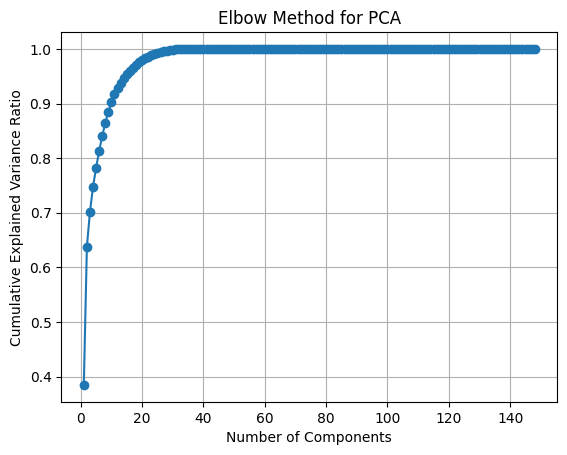

In [ ]:
# Perform PCA with different numbers of components
import matplotlib.pyplot as plt
import seaborn as sns

n_components = np.arange(1, len(X_train_resampled.columns) + 1)
explained_variance = []
for n in n_components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_resampled)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

# Plot the cumulative explained variance ratio
plt.plot(n_components, explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Elbow Method for PCA')
plt.grid(True)
plt.show()



In [ ]:
# Perform PCA with the desired number of components
n_components = 38
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test_resampled)

# Print the cumulative explained variance ratio
print("Cumulative Explained Variance Ratio:", np.sum(pca.explained_variance_ratio_))


Cumulative Explained Variance Ratio: 1.0000000000000004


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_pca, y_train_resampled, test_size=0.2, random_state=42)


In [ ]:
##I choose to opt RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.83      0.86      8713
           1       0.84      0.89      0.87      8837

    accuracy                           0.86     17550
   macro avg       0.86      0.86      0.86     17550
weighted avg       0.86      0.86      0.86     17550



Here's a breakdown of the metrics:

Precision: It measures the proportion of correctly predicted positive instances out of the total predicted positive instances. For class 0, the precision is 0.89, indicating that 89% of the instances predicted as class 0 are actually class 0. For class 1, the precision is 0.84, meaning that 84% of the instances predicted as class 1 are actually class 1.

Recall: It measures the proportion of correctly predicted positive instances out of the total actual positive instances. For class 0, the recall is 0.83, indicating that 83% of the actual class 0 instances are correctly predicted. For class 1, the recall is 0.90, meaning that 90% of the actual class 1 instances are correctly predicted.

F1-score: It is the harmonic mean of precision and recall, providing a balance between the two metrics. For class 0, the F1-score is 0.86, and for class 1, it is 0.87.

Support: It represents the number of instances in each class.

The accuracy of the model is calculated as the overall proportion of correctly predicted instances, which is 0.86 in this case.

Overall, the macro average and weighted average of the precision, recall, and F1-score are around 0.86, indicating a relatively good performance of the model in classifying the data.

In [ ]:
 y_test_pred=rf_classifier.predict(X_test)

In [ ]:

y_test_pred

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:



y_test_pred_df = pd.DataFrame(y_test_pred)

# Convert X_test to a DataFrame with column names
X_test_df = pd.DataFrame(X_test)

# Concatenate X_test_df and y_test_pred_df horizontally
X_test_with_predictions = pd.concat([X_test_df, y_test_pred_df], axis=1)


In [ ]:
X_test_with_predictions

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,0
0,-0.365884,2.842220,-0.284307,-0.583568,-0.386958,0.259303,0.861888,-0.273543,0.089196,-0.090546,-0.070179,-0.052269,0.026943,-0.097700,-0.085328,-0.016584,0.228990,-0.011229,-0.069824,-0.050853,0.016872,-0.024088,-0.000983,-0.001017,0.066292,0.023116,0.005204,-0.001999,0.004096,-0.003201,0.004983,-0.001349,0.000640,-0.002114,2.192781e-16,3.501217e-17,-5.529658e-17,-3.257375e-17,1
1,-2.751168,-2.020699,-0.692480,0.025917,-0.093029,0.095429,-0.055931,-0.140989,-0.175003,0.079616,0.963365,-0.544887,0.057302,-0.091286,-0.019272,-0.028557,-0.289609,-0.016051,0.166963,-0.002933,-0.065602,0.020493,0.000671,-0.021010,-0.120221,-0.051841,-0.013748,-0.024871,-0.004023,0.006126,-0.014963,-0.001615,-0.001875,0.002060,2.282703e-16,3.342270e-17,1.566025e-16,1.015660e-16,0
2,3.751121,-1.267769,-0.036930,-0.293746,-0.171911,0.145284,0.907003,-0.255557,0.037328,-0.109870,-0.062489,-0.055604,0.059244,-0.056512,-0.071926,-0.008982,0.211229,-0.038668,-0.099579,-0.029408,0.014703,-0.021489,-0.017378,-0.003166,0.103195,0.028076,0.006155,0.003696,-0.000870,0.000126,0.004053,-0.000396,0.001130,0.049032,2.496389e-16,-1.177058e-16,5.828303e-17,-1.096903e-16,0
3,3.646036,-1.375625,-0.102047,-0.128681,-0.026870,0.179634,-0.820533,0.259134,0.306273,-0.906147,-0.251775,-0.293245,-0.012014,-0.049265,0.091877,-0.018022,-0.360269,-0.017347,0.201615,0.034061,-0.025900,0.044952,-0.014098,-0.035491,0.290593,0.028682,0.031670,0.004709,-0.001341,-0.006628,-0.000004,0.003335,-0.001431,-0.030837,2.191931e-16,-2.916125e-17,4.957793e-17,-6.149987e-17,1
4,3.641930,-1.381992,-0.108955,-0.143328,-0.035075,0.121040,-0.524681,0.089421,-0.126974,0.916584,-0.740810,-0.471806,0.088675,-0.163870,-0.107737,-0.036067,0.366911,-0.070902,-0.169900,-0.071213,0.039315,-0.055448,-0.033562,0.013151,0.023368,0.020087,0.001016,0.011131,0.003178,-0.003154,0.010717,-0.002302,0.001135,0.033556,1.308145e-16,2.106722e-16,-1.229660e-16,9.812847e-17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17545,-0.966881,0.411925,1.541608,1.882686,1.550637,2.259582,0.054418,0.272048,0.241964,0.435275,1.177205,-0.622926,-0.096450,-0.234519,0.061856,-0.030687,-0.202457,-0.016942,0.130498,-0.003952,-0.007937,-0.026021,0.002661,-0.007800,-0.020324,-0.010186,0.002483,0.002456,0.003727,-0.009705,0.003595,0.001267,0.000324,0.054724,3.248784e-16,2.016544e-16,-2.988436e-16,3.344131e-16,0
17546,-2.695633,-1.962338,-0.622943,-0.005731,-0.090886,0.090266,0.072890,-0.120478,-0.083694,-0.098598,-0.082692,0.282906,-0.023785,0.053294,-0.025362,0.065802,0.028894,0.071833,-0.095958,0.115932,0.014240,0.075265,0.081792,0.070389,-0.253541,0.061419,-0.010206,0.297363,-0.078006,0.104807,1.373815,-0.116299,-0.019312,0.015078,2.220373e-16,5.922320e-17,-9.311905e-17,-1.322000e-17,1
17547,-2.732771,-2.000715,-0.670518,0.019257,-0.090336,0.089087,-0.021579,-0.142714,-0.167906,0.061625,0.964013,-0.506056,0.134901,-0.155068,-0.178917,-0.035130,0.254015,-0.046984,-0.103481,-0.075866,-0.022020,-0.046507,-0.009090,0.008134,-0.260857,-0.047559,-0.033095,-0.022819,-0.001874,0.009260,-0.008168,-0.005550,-0.001010,-0.014830,2.116409e-16,-1.547180e-17,1.395642e-16,9.768059e-17,0
17548,-0.461603,2.744389,-0.337226,-0.420789,-0.239513,0.289628,-0.851440,0.241345,0.362525,-0.895841,-0.257224,-0.273457,-0.011293,-0.117481,0.005484,-0.028638,-0.103240,0.000048,0.109158,-0.022187,-0.007605,0.006093,-0.003688,-0.011475,0.075288,0.004187,0.011595,-0.001192,0.004501,-0.006446,0.002097,-0.000042,0.000035,0.016254,1.978922e-16,6.596058e-18,-6.155045e-17,-2.931534e-17,1
